Assignment 2:

Visualization

In [8]:
# Import necessary libraries
from IPython import get_ipython  # Used for interacting with the IPython kernel
from IPython.display import display # Used for displaying outputs in the notebook

# %%
# This cell imports essential libraries for data analysis and visualization
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For basic plotting and visualizations
import seaborn as sns  # For more advanced statistical visualizations

# Load the dataset
df = pd.read_excel(r'C:/Users/ADMIN/Downloads/Superstore.xls', sheet_name='Orders') # Reads data from an Excel file into a Pandas DataFrame

# Data Cleaning
df.dropna(inplace=True) # Removes rows with missing values from the DataFrame

Perform the following task (20 POINTS EACH):

In [37]:
pd.set_option('display.max_columns', None)

In [38]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


               Sales
Region              
Central  501239.8908
East     678781.2400
South    391721.9050
West     725457.8245


''

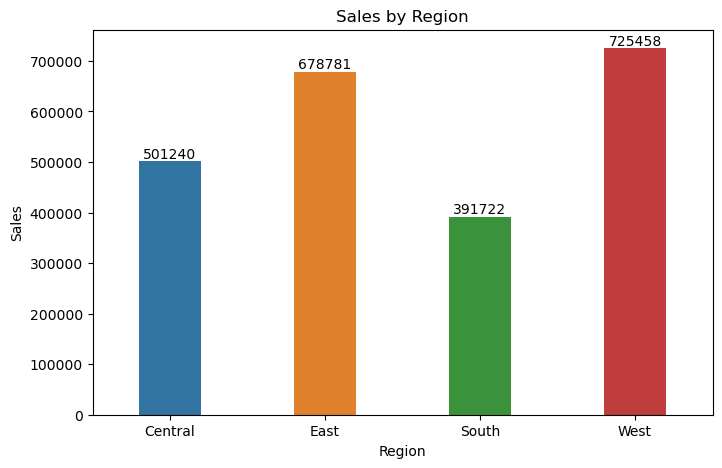

In [22]:
# TASK 1
# Group data by 'Region' and sum 'Sales'
# Sort by Sales in ascending order
# Create a bar plot
sales_by_region=df.groupby('Region')['Sales'].sum().to_frame()
print(sales_by_region)

plt.figure(figsize=(8,5))
ax=sns.barplot(data=sales_by_region, x='Region', y='Sales', width=0.4, hue='Region', legend=False)
ax.set_title('Sales by Region')

for i in ax.containers:
    ax.bar_label(i,)
;

                       Sales
Category                    
Furniture        741999.7953
Office Supplies  719047.0320
Technology       836154.0330


''

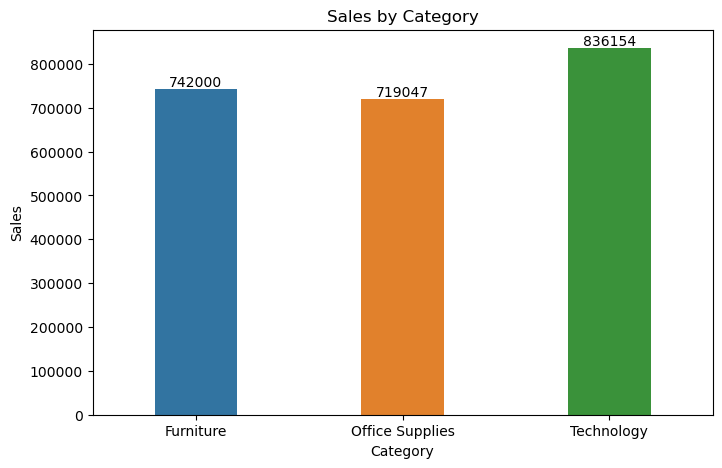

In [24]:
# TASK 2
# Sales by Category
sales_by_category=df.groupby('Category')['Sales'].sum().to_frame()
print(sales_by_category)

plt.figure(figsize=(8,5))
ax=sns.barplot(data=sales_by_category, x='Category', y='Sales', width=0.4, hue='Category', legend=False)
ax.set_title('Sales by Category')

for i in ax.containers:
    ax.bar_label(i,)
;

                    Sales
Sub-Category             
Accessories   167380.3180
Appliances    107532.1610
Art            27118.7920
Binders       203412.7330
Bookcases     114879.9963
Chairs        328449.1030
Copiers       149528.0300
Envelopes      16476.4020
Fasteners       3024.2800
Furnishings    91705.1640
Labels         12486.3120
Machines      189238.6310
Paper          78479.2060
Phones        330007.0540
Storage       223843.6080
Supplies       46673.5380
Tables        206965.5320


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_360\3633086533.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


''

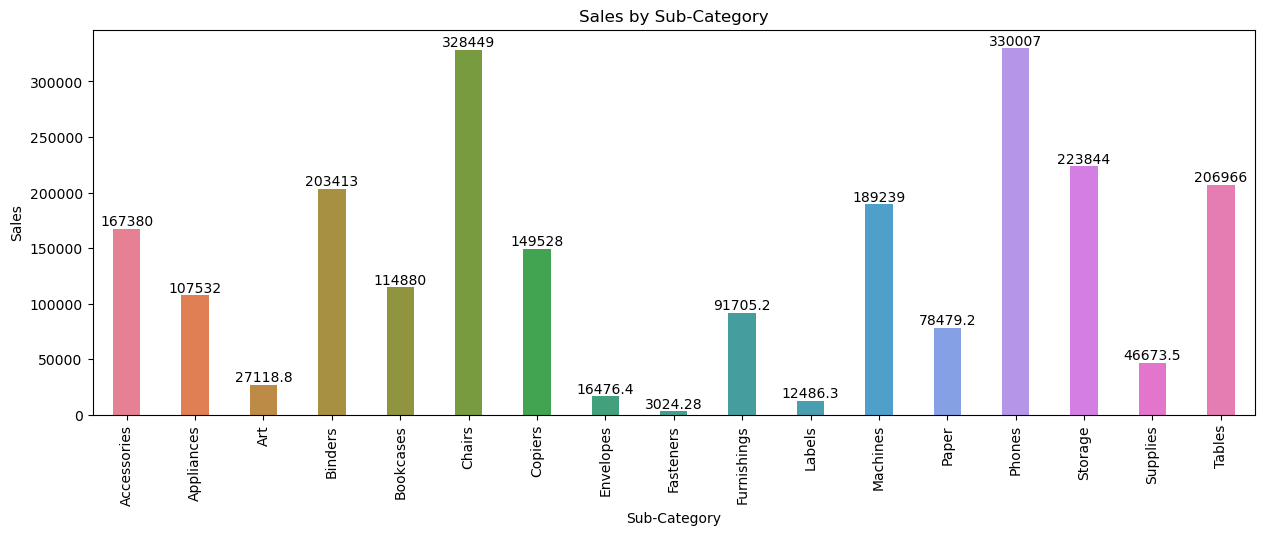

In [29]:
# TASK 3
# Sales by Sub-Category
sales_by_sub_category=df.groupby('Sub-Category')['Sales'].sum().to_frame()
print(sales_by_sub_category)

plt.figure(figsize=(15,5))
ax=sns.barplot(data=sales_by_sub_category, x='Sub-Category', y='Sales', width=0.4, hue='Sub-Category', legend=False)
ax.set_title('Sales by Sub-Category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for i in ax.containers:
    ax.bar_label(i,)
;

In [48]:
# TASK 4
# Sales by Ship Mode and Region0
sales_by_ship_mode_region=df.groupby(['Ship Mode', 'Region'])['Sales'].sum().to_frame()
pivot_table1=pd.pivot_table(sales_by_ship_mode_region, 
                             values='Sales', 
                             index='Region', 
                             columns='Ship Mode', 
                             aggfunc='sum',
                             fill_value=0)
pivot_table1

Ship Mode,First Class,Same Day,Second Class,Standard Class
Region,,,,
Central,58746.9154,20415.410,103550.0054,318527.5600
East,113587.0530,43326.832,116545.5240,405321.8310
South,49332.5660,21017.173,93758.6125,227613.5535
West,129761.8885,43603.710,145339.4275,406752.7985


In [46]:
# TASK 5
# Sales by State and Region
sales_by_state_region=df.groupby(['State', 'Region'])['Sales'].sum().to_frame()
# pivot_table2=pd.pivot_table(sales_by_state_region, 
#                              values='Sales', 
#                              index='State', 
#                              columns='Region', 
#                              aggfunc='sum',
#                              fill_value=0)
# pivot_table2
sales_by_state_region

,,Sales
State,Region,
Alabama,South,19510.6400
Arizona,West,35282.0010
Arkansas,South,11678.1300
California,West,457687.6315
Colorado,West,32108.1180
Connecticut,East,13384.3570
Delaware,East,27451.0690
District of Columbia,East,2865.0200
Florida,South,89473.7080
